### Idea for denoising archetecture
0. Split datasets into existing (as primer for training and validating (0-40 dB SNR)) and new (more music samples for more background noise etc (-5-10 dB SNR))
1. Need dedicated validation and testing sets for noisy (-5-10 dB SNR) and light-noisy (0-40 dB SNR) datsets.


Environmental Sound Classification 50

structure should be:

x -> e1d -> e2d -> e3d -> bnd -> d1d -> d2d -> b3d -> y1 \\
y1 * x -> e1r -> e2r -> e3r -> bnr -> d1r -> d2r -> d3r -> y2 \\

with skip connections from e(i)d to d(i)d and d(i)r and from e(i)r ro d(i)r.

In [1]:
import sys
import os

# Detect Google Colab
if "google.colab" in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Detect Google Colab
if "google.colab" in sys.modules:
    print("Running in Google Colab...")
    os.system("git clone https://github.com/CiaranMaloy/audioautoencoder")
    os.chdir("/content/audioautoencoder/")
    os.system("git pull")
    os.system("git checkout refactor")
    os.system("git pull origin refactor")
    os.system("pip install --upgrade torchmetrics")
else:
    print("Running locally...")
    os.system("git pull origin refactor")
    os.system("pip install --upgrade torchmetrics")


Running in Google Colab...


In [3]:
import sys
sys.path.append('/content/audioautoencoder')
sys.path.append('/content/audioautoencoder/audioautoencoder')

In [4]:
from audioautoencoder.data import *
from audioautoencoder.outputs import *
from audioautoencoder.processing import *
from audioautoencoder.training import *
from audioautoencoder.datasets.loaders import *
from audioautoencoder.generate_dataset import *
from audioautoencoder.plotting import *

test get item input and output to see if i can use the log magnitude and then reverse it on the output

## Data Generation

In [5]:
from audioautoencoder.data_management import *

In [6]:
GENERATE=False

In [7]:
# Example Usage
if GENERATE:
  dataset_dirs = ["/content/drive/MyDrive/Datasets/Noise/All_Noise"]
  output_dir = "/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2"
  splits = create_datasets(dataset_dirs, output_dir)
  print("Training Set:", len(splits["train"]))
  print("Validation Set:", len(splits["val"]))
  print("Testing Set:", len(splits["test"]))


In [8]:
if GENERATE:
  save_splits_to_directories(splits, output_dir, max_workers=8)

In [9]:
# generate audio files for noise and music (2s)
if GENERATE:
  noise_test = output_dir + "/test"
  noise_train = output_dir + "/train"

  noise_test_output = noise_test + "-2s-44100"
  noise_train_output = noise_train + "-2s-44100"

  for input_path, output_path in [(noise_test, noise_test_output), (noise_train, noise_train_output)]:
    print(input_path, output_path)
    generate_audio_files(input_path, output_path, t=2)

In [10]:
# generate audio files for noise and music (2s)
if False:
  music_test = "/content/drive/MyDrive/Datasets/Music/MUSDB18--test/test"
  music_train = "/content/drive/MyDrive/Datasets/Music/MUSDB18--test/train"

  music_test_output = music_test + "-2s-44100"
  music_train_output = music_train + "-2s-44100"

  for input_path, output_path in [(music_test, music_test_output), (music_train, music_train_output)]:
    print(input_path, output_path)
    generate_audio_files(input_path, output_path, t=2)

## Process files to H5

In [11]:
GENERATE_H5_FILES = False
if GENERATE_H5_FILES:
  processor = DatasetProcessor(
          train_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/train-2s-44100',
          train_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/train-2s-44100',
          test_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/test-2s-44100',
          test_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/test-2s-44100',
          output_dir='/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_sep',
          SNRdB=[-10, 10],
          process_train=True,
          process_test=True
      )
  processor.process()

  processor = DatasetProcessor(
          train_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/train-2s-44100',
          train_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/train-2s-44100',
          test_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/test-2s-44100',
          test_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/test-2s-44100',
          output_dir='/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_sep',
          SNRdB=[0, 20],
          process_train=True,
          process_test=True
      )
  processor.process()

  processor = DatasetProcessor(
          train_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/train-2s-44100',
          train_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/train-2s-44100',
          test_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/test-2s-44100',
          test_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/test-2s-44100',
          output_dir='/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_sep',
          SNRdB=[10, 30],
          process_train=True,
          process_test=True
      )
  processor.process()

  processor = DatasetProcessor(
          train_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/train-2s-44100',
          train_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/train-2s-44100',
          test_music_dir='/content/drive/MyDrive/Datasets/Music/MUSDB18/test-2s-44100',
          test_noise_dir='/content/drive/MyDrive/Datasets/Noise/All_Noise/splits_v2/test-2s-44100',
          output_dir='/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_mix',
          SNRdB=[-10, 30],
          process_train=True,
          process_test=True,
          mix_only=True
      )
  processor.process()

## Define Autoencoder structure

## Improvement to UnetAutoencoder

1. changed padding from explicit to on the output of the convolutional layer
2. added batch normalisation between layers
3. changed fro elu to leaky_relu for efficiency
4. in the other one there is no pooling... and the skip connections are done by concatenation?

In [12]:
from audioautoencoder.models.UNetDenoisingAutoencoder import UNetDenoisingAutoencoder

#### For v3, remove pooling layers, and add attention onto skip connections

In addition, try only music and only crowd as a dataset

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# too big without.... lets try, halfing the expansion
# apternaitvely use max pooling instead of average pooling

class UNetConv3(nn.Module):
    # Update from UnetConv2, no pooling layers
    def __init__(self, in_channels=2, out_channels=1):
        super(UNetConv3, self).__init__()

        a = 2

        # Encoder (Downsampling)
        enc_channels = [in_channels, 32, 64, 64, 128]
        self.enc1 = self.conv_block(enc_channels[0], enc_channels[1], 7)
        self.enc2 = self.conv_block(enc_channels[1], enc_channels[2], 5)
        self.enc3 = self.conv_block(enc_channels[2], enc_channels[3], 3)
        self.enc4 = self.conv_block(enc_channels[3], enc_channels[4], 3)

        # Bottleneck
        bottleneck_channels = 256
        self.bottleneck = self.conv_block(enc_channels[4], bottleneck_channels, 3)

        # Decoder (Upsampling)
        dec_channels = [bottleneck_channels, 128, 64, 64, 32]
        self.dec4 = self.upconv_block(dec_channels[0], dec_channels[1], 3)
        self.dec3 = self.upconv_block(dec_channels[1] + enc_channels[4], dec_channels[2], 3)
        self.dec2 = self.upconv_block(dec_channels[2] + enc_channels[3], dec_channels[3], 5)
        self.dec1 = self.upconv_block(dec_channels[3] + enc_channels[2], dec_channels[4], 7)

        # Final Output Layer
        self.final = nn.Conv2d(dec_channels[4] + enc_channels[1], out_channels, kernel_size=3, padding=1)

    def conv_block(self, in_channels, out_channels, kernel_size, dropout=0.2):
        """Convolutional Block with Dropout in Deeper Layers Only"""
        layers = [
            nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2, inplace=True),
        ]

        # Dropout only for deeper encoder layers
        if out_channels >= 256:
            layers.append(nn.Dropout(dropout))

        return nn.Sequential(*layers)

    def upconv_block(self, in_channels, out_channels, kernel_size, dropout=0.2):
        """Upsampling Block with Dropout in First Few Decoder Layers"""
        layers = [
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=kernel_size, stride=2),
            nn.LeakyReLU(0.2, inplace=True),
        ]

        # Dropout only for first few decoder layers
        if in_channels >= 128:
            layers.append(nn.Dropout(dropout))

        return nn.Sequential(*layers)


    def forward(self, x):
        """Forward pass with skip connections"""
        # Encoding
        e1 = self.enc1(x)  # (batch, 64, 1028, 175)
        e2 = self.enc2(e1) # (batch, 128, 514, 87)
        e3 = self.enc3(e2)  # (batch, 256, 257, 43)
        e4 = self.enc4(e3) # (batch, 512, 128, 21)

        # Bottleneck
        b = self.bottleneck(e4)  # (batch, 1024, 64, 10)

        # Decoding + Skip Connections
        d4 = self.dec4(b)  # (batch, 512, ?, ?)
        d4 = F.interpolate(d4, size=e4.shape[2:], mode="bilinear", align_corners=False)
        d4 = torch.cat([d4, e4], dim=1)

        d3 = self.dec3(d4)  # (batch, 256, ?, ?)
        d3 = F.interpolate(d3, size=e3.shape[2:], mode="bilinear", align_corners=False)
        d3 = torch.cat([d3, e3], dim=1)

        d2 = self.dec2(d3)  # (batch, 128, ?, ?)
        d2 = F.interpolate(d2, size=e2.shape[2:], mode="bilinear", align_corners=False)
        d2 = torch.cat([d2, e2], dim=1)

        d1 = self.dec1(d2)  # (batch, 64, ?, ?)
        d1 = F.interpolate(d1, size=e1.shape[2:], mode="bilinear", align_corners=False)
        d1 = torch.cat([d1, e1], dim=1)

        # Final Convolution (output denoised spectrogram)
        return F.interpolate(self.final(d1), size=(1025, 175), mode="bilinear", align_corners=False)


In [16]:
BATCH_SIZE = 4

In [17]:
if __name__ == "__main__":
    x = torch.randn((BATCH_SIZE, 2, 1025, 175))
    model = UNetConv3()
    output = model(x)

    print('output....')
    print(output.shape)

output....
torch.Size([4, 1, 1025, 175])


In [18]:
import unittest
import torch
from torchsummary import summary

class TestAutoencoder(unittest.TestCase):
    def setUp(self):
        self.model = UNetConv3()
        self.input_channels = 2
        self.output_channels = 1
        self.input_height = 1025
        self.input_width = 175
        self.batch_size = BATCH_SIZE
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)

    def test_model_initialization(self):
        self.assertIsInstance(self.model, UNetConv3, "Model initialization failed")

    def test_forward_pass(self):
        x = torch.randn(self.batch_size, self.input_channels, self.input_height, self.input_width, device=self.device)
        output = self.model(x)
        self.assertEqual(
            output.shape,
            (self.batch_size, self.output_channels, self.input_height, self.input_width),
            f"Expected output shape {(self.batch_size, self.output_channels, self.input_height, self.input_width)}, but got {output.shape}"
        )

    def test_model_summary(self):
        try:
            summary(self.model, input_size=(self.input_channels, self.input_height, self.input_width))
        except Exception as e:
            self.fail(f"Model summary failed: {str(e)}")

# This allows running tests externally
def suite():
    test_suite = unittest.TestLoader().loadTestsFromTestCase(TestAutoencoder)
    return test_suite

# runner
class TestRunner:
    def __init__(self):
        self.runner = unittest.TextTestRunner()

    def run(self):
        print("Running autoencoder tests...")
        self.runner.run(suite())

if __name__ == "__main__":
    runner = TestRunner()
    runner.run()

Running autoencoder tests...


...
----------------------------------------------------------------------
Ran 3 tests in 1.446s

OK


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 32, 1021, 171]           3,168
       BatchNorm2d-2        [-1, 32, 1021, 171]              64
         LeakyReLU-3        [-1, 32, 1021, 171]               0
            Conv2d-4        [-1, 32, 1017, 167]          50,208
       BatchNorm2d-5        [-1, 32, 1017, 167]              64
         LeakyReLU-6        [-1, 32, 1017, 167]               0
            Conv2d-7        [-1, 64, 1015, 165]          51,264
       BatchNorm2d-8        [-1, 64, 1015, 165]             128
         LeakyReLU-9        [-1, 64, 1015, 165]               0
           Conv2d-10        [-1, 64, 1013, 163]         102,464
      BatchNorm2d-11        [-1, 64, 1013, 163]             128
        LeakyReLU-12        [-1, 64, 1013, 163]               0
           Conv2d-13        [-1, 64, 1013, 163]          36,928
      BatchNorm2d-14        [-1, 64, 10

## First train as an autoencoder for music

## Download file to local

In [19]:
from audioautoencoder.plotting import *
from audioautoencoder.datasets.utils import *

In [20]:
i = 0
train = True

# --------------- Main Execution parameters ---------------
model_name = 'UNetConv3'
SNRdB_load = [-10, 10]
SNRdBs = [[-10, 10]] # SNR random range
load_trigger = [False]
load_file = 'Autoencodermodel_earlystopping.pth'
#load_file = 'Autoencodermodel_checkpoint.pth'

folder = ['sep'][i] # sep

# parameters
learning_rates = [1e-3]

base_lr=1e-5
max_lr=learning_rates[i]
gamma=0.8

# data params
max_file_size_gb = 100
IMPORT_TRAIN_NOISY = True
batch_size = 4

# training params
load = load_trigger[i]
warm_start = False
epochs = 69
accumulation_steps = 32

SNRdB = SNRdBs[i]
learning_rate = learning_rates[i]
eta_min = 1e-6

print('lr:', learning_rate)
print('SNRdB:', SNRdB)

lr: 0.0001
SNRdB: [-10, 10]


In [21]:
# --------------- In Loop Parameters --------------
output_path = f'/content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_{model_name}_{SNRdB[0]}-{SNRdB[1]}/'
load_path = f'/content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_{model_name}_{SNRdB_load[0]}-{SNRdB_load[1]}/{load_file}'

In [22]:
# Define the source and destination file paths
source_folder = f"/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_{folder}/SNRdB_{SNRdB[0]}-{SNRdB[1]}/"
source_path = source_folder + "train/"
destination_path = f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/train/"
save_path = source_folder + "combined_000.h5"

if IMPORT_TRAIN_NOISY:
  if not os.path.exists(destination_path):
    combine_h5_files(source_path, destination_path, max_file_size_gb=max_file_size_gb)

  train_loader = NoisyDatasetLoader(
        dataset_path=f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/train/combined_000.h5",
        output_time_length=175,
        channels=1,
        snr_db=SNRdB,
        subset=True,
        batch_size=batch_size
    )

  print(f"Training set size: {len(train_loader.train_dataset)}")
  print(f"Validation set size: {len(train_loader.val_dataset)}")

Input dataset shape: (26162, 2, 1025, 175)
Target dataset shape: (26162, 2, 1025, 175)
Training set size: 7325
Validation set size: 1831
Training set size: 7325
Validation set size: 1831


# Retrain Model

In [23]:
from audioautoencoder.loss import *
from audioautoencoder.utils import *

In [24]:
import torch

torch.cuda.empty_cache()

In [25]:
# Instantiate the model, define loss function and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNetConv3().to(device)

print(device)

cuda


In [26]:
if load:
  optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-5)
  #scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=eta_min)
  scheduler_loss = False
else:
  optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-5)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=eta_min)
  scheduler_loss = False

  #optimizer = None #torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
  #scheduler = None #torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)
  #scheduler_loss = False #True

Training on device: cuda
Epoch 1, Current Learning Rate: [0.0001]


Training:   0%|          | 0/1832 [00:00<?, ?batch/s]

New kl loss beta: 0.0


Validating: 100%|██████████| 458/458 [01:10<00:00,  6.53batch/s, loss=joint loss: 0.7579]


--------------------------------------------------
Epoch 1, Validation Loss: 0.7579
Validation score improved. Saving model to /content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_UNetConv3_-10-10/Autoencodermodel_earlystopping.pth.
Saved to Drive...


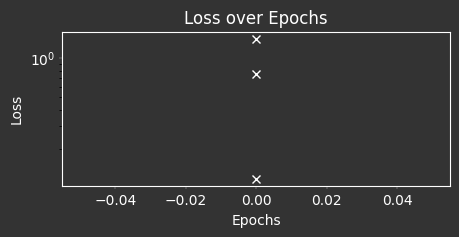

Epoch [1/69], Loss: 1.4074
--------------------------------------------------
Epoch 2, Current Learning Rate: [9.757729755661011e-05]


Training:   0%|          | 0/1832 [00:00<?, ?batch/s]

New kl loss beta: 0.014492753623188406


Validating: 100%|██████████| 458/458 [01:07<00:00,  6.74batch/s, loss=joint loss: 0.3426]


--------------------------------------------------
Epoch 2, Validation Loss: 0.3426
Validation score improved. Saving model to /content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_UNetConv3_-10-10/Autoencodermodel_earlystopping.pth.
Saved to Drive...


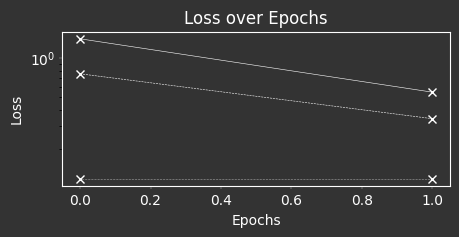

Epoch [2/69], Loss: 0.5477
--------------------------------------------------
Epoch 3, Current Learning Rate: [9.05463412215599e-05]


Training:   0%|          | 0/1832 [00:00<?, ?batch/s]

New kl loss beta: 0.028985507246376812


Validating: 100%|██████████| 458/458 [01:08<00:00,  6.66batch/s, loss=joint loss: 0.2374]


--------------------------------------------------
Epoch 3, Validation Loss: 0.2374
Validation score improved. Saving model to /content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_UNetConv3_-10-10/Autoencodermodel_earlystopping.pth.
Saved to Drive...


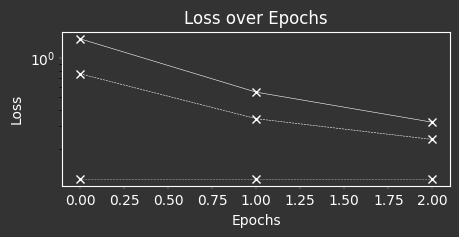

Epoch [3/69], Loss: 0.3219
--------------------------------------------------
Epoch 4, Current Learning Rate: [7.959536998847742e-05]


Training:   0%|          | 0/1832 [00:00<?, ?batch/s]

New kl loss beta: 0.043478260869565216


Validating: 100%|██████████| 458/458 [01:09<00:00,  6.59batch/s, loss=joint loss: 0.1932]


--------------------------------------------------
Epoch 4, Validation Loss: 0.1932
Validation score improved. Saving model to /content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_UNetConv3_-10-10/Autoencodermodel_earlystopping.pth.
Saved to Drive...


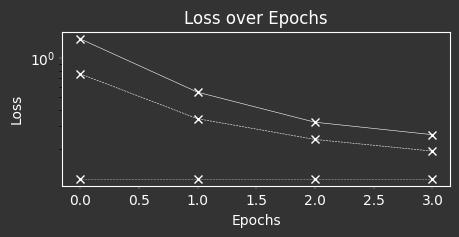

Epoch [4/69], Loss: 0.2583
--------------------------------------------------
Epoch 5, Current Learning Rate: [6.57963412215599e-05]


Training:   0%|          | 0/1832 [00:00<?, ?batch/s]

New kl loss beta: 0.057971014492753624


Validating: 100%|██████████| 458/458 [01:12<00:00,  6.33batch/s, loss=joint loss: 0.1645]


--------------------------------------------------
Epoch 5, Validation Loss: 0.1645
Validation score improved. Saving model to /content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_UNetConv3_-10-10/Autoencodermodel_earlystopping.pth.
Saved to Drive...


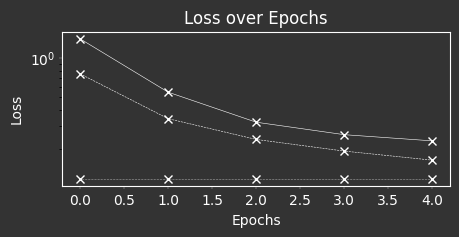

Epoch [5/69], Loss: 0.2315
--------------------------------------------------
Epoch 6, Current Learning Rate: [5.05e-05]


Training:   0%|          | 0/1832 [00:00<?, ?batch/s]

New kl loss beta: 0.07246376811594203


Validating: 100%|██████████| 458/458 [01:10<00:00,  6.53batch/s, loss=joint loss: 0.1598]


--------------------------------------------------
Epoch 6, Validation Loss: 0.1598
Validation score improved. Saving model to /content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_UNetConv3_-10-10/Autoencodermodel_earlystopping.pth.
Saved to Drive...


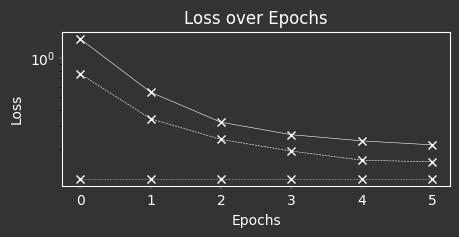

Epoch [6/69], Loss: 0.2157
--------------------------------------------------
Epoch 7, Current Learning Rate: [3.5203658778440106e-05]


Training:   0%|          | 0/1832 [00:00<?, ?batch/s]

New kl loss beta: 0.08695652173913043


Validating: 100%|██████████| 458/458 [01:10<00:00,  6.45batch/s, loss=joint loss: 0.1406]


--------------------------------------------------
Epoch 7, Validation Loss: 0.1406
Validation score improved. Saving model to /content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_UNetConv3_-10-10/Autoencodermodel_earlystopping.pth.
Saved to Drive...


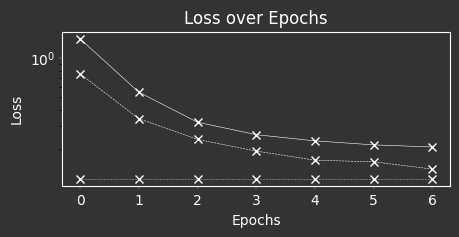

Epoch [7/69], Loss: 0.2077
--------------------------------------------------
Epoch 8, Current Learning Rate: [2.1404630011522586e-05]


Training:   0%|          | 0/1832 [00:00<?, ?batch/s]

New kl loss beta: 0.10144927536231885


Validating: 100%|██████████| 458/458 [01:12<00:00,  6.34batch/s, loss=joint loss: 0.1422]


--------------------------------------------------
Epoch 8, Validation Loss: 0.1422
EarlyStopping counter: 1 out of 100
Saved to Drive...


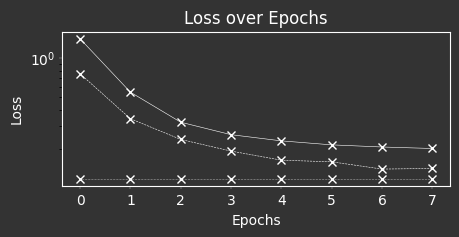

Epoch [8/69], Loss: 0.2023
--------------------------------------------------
Epoch 9, Current Learning Rate: [1.0453658778440109e-05]


Training:   0%|          | 0/1832 [00:00<?, ?batch/s]

New kl loss beta: 0.11594202898550725


Validating: 100%|██████████| 458/458 [01:11<00:00,  6.44batch/s, loss=joint loss: 0.1362]


--------------------------------------------------
Epoch 9, Validation Loss: 0.1362
Validation score improved. Saving model to /content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Denoising/Checkpoints_UNetConv3_-10-10/Autoencodermodel_earlystopping.pth.
Saved to Drive...


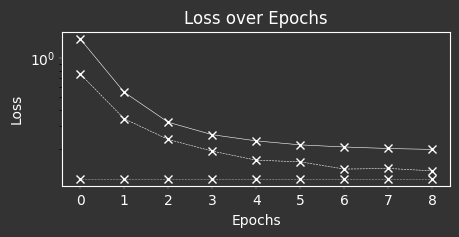

Epoch [9/69], Loss: 0.1990
--------------------------------------------------
Epoch 10, Current Learning Rate: [3.4227024433899e-06]


Training:   0%|          | 0/1832 [00:00<?, ?batch/s]

New kl loss beta: 0.13043478260869565


Validating: 100%|██████████| 458/458 [01:11<00:00,  6.44batch/s, loss=joint loss: 0.1363]


--------------------------------------------------
Epoch 10, Validation Loss: 0.1363
EarlyStopping counter: 1 out of 100
Saved to Drive...


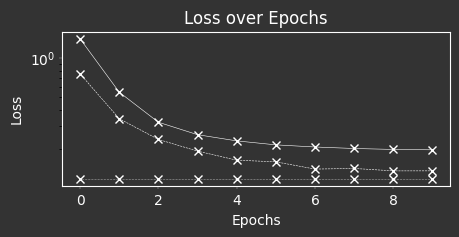

Epoch [10/69], Loss: 0.1977
--------------------------------------------------
Epoch 11, Current Learning Rate: [0.0001]


Training:   0%|          | 0/1832 [00:00<?, ?batch/s]

New kl loss beta: 0.14492753623188406


Training:  38%|███▊      | 693/1832 [03:33<05:59,  3.17batch/s, loss=loss: 0.3467, ref:0.1182]

In [ ]:
trainer = DenoisingTrainer(
    model=model, noisy_train_loader=train_loader.train_loader, noisy_val_loader=train_loader.val_loader,
    SNRdB=SNRdB, output_path=output_path, epochs=epochs, learning_rate=learning_rate,
    load=load, warm_start=warm_start, train=train, verbose=False, accumulation_steps=accumulation_steps, load_path=load_path,
    base_lr=base_lr, max_lr=max_lr, gamma=gamma, optimizer=optimizer, scheduler=scheduler, scheduler_loss=scheduler_loss
)
trainer.train_or_evaluate()
model = trainer.get_model()

# I need a flat load model function somewhere, as now I need to define a train loader before I can load a model
csv_file_path = output_path + "training_log.csv"
plot_training_log(csv_file_path)

## Testing

## Testing:

In [ ]:
# Define the source and destination file paths
SNRdB = [-10, 10] # SNR random range
#filename = f"train-SNRdB_{SNRdB}-1s-44-1khz-magnitude-freqweightmagnitude-phase.h5"
source_folder = f"/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_sep/SNRdB_{SNRdB[0]}-{SNRdB[1]}/"
source_path = source_folder + "test/"
destination_path = f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/test/"

save_path = source_folder + "combined_000.h5"

In [ ]:
IMPORT_TEST_NOISY = True

In [ ]:
max_file_size_gb = 30

In [ ]:
destination_path = f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/test/"

if IMPORT_TEST_NOISY:
  if not os.path.exists(destination_path):
    combine_h5_files(source_path, destination_path, max_file_size_gb=max_file_size_gb)

View Pretrained Model Performance

In [ ]:
# checking file contents
file = f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/test/combined_000.h5"

# Path to the HDF5 file
h5_file_path = file
n = 50
try:
    # Open the HDF5 file
    with h5py.File(h5_file_path, "r") as h5f:
        # Load 5 instances from the training and testing datasets
        input_images = h5f["input_images"][n:n+5]  # First 5 instances
        target_images = h5f["target_images"][n:n+5]  # First 5 instances
        filenames = h5f["filenames"][n:n+5]
        snr_db = h5f["snr_db"][n:n+5]

        # Convert to NumPy arrays (if not already)
        input_images = np.array(input_images)
        target_images = np.array(target_images)
        filenames = np.array(filenames)
        snr_db = np.array(snr_db)

        print("Loaded 5 training/testing instances:")
        print("Input dataset shape:", input_images.shape)
        print("Target dataset shape:", target_images.shape)

        print(filenames[0:3])
        print(snr_db[0:3])

except Exception as e:
    print("Error reading HDF5 file:", e)

In [ ]:
from audioautoencoder.datasets.utils import *

In [ ]:
if IMPORT_TEST_NOISY:
    test_loader = NoisyDatasetLoader(
        dataset_path=f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/test/combined_000.h5",
        output_time_length=175,
        channels=1,
        snr_db=SNRdB,
        subset=False,
        batch_size=32,
        metadata=True
    )

    print(f"Training set size: {len(test_loader.train_dataset)}")
    print(f"Validation set size: {len(test_loader.val_dataset)}")

In [ ]:
!git pull

In [ ]:
from audioautoencoder.testing import *

In [ ]:
import torch
from tqdm import tqdm
from loss import *

# Testing loop
def test_model(model, test_loader, criterion):
    evaluation = Evaluation()

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        progress_bar = tqdm(test_loader, desc="Testing", unit="batch")
        for inputs, targets, metadata in progress_bar:

          inputs, targets = inputs.to(device), targets.to(device)

          outputs = model(inputs)
          loss = criterion(outputs, targets)
          progress_bar.set_postfix(loss=f"{loss.item():.4f}")
          test_loss += loss.item()

          # evaluation
          evaluation.evaluate(inputs, targets, outputs, metadata)

        test_loss /= len(test_loader)

    return test_loss, evaluation.process()

import torch
import torch.nn.functional as F
import pandas as pd
from tqdm import tqdm
from torchmetrics.audio import SignalDistortionRatio

class Evaluation:
    def __init__(self, device="cuda" if torch.cuda.is_available() else "cpu"):
        """Initialize storage for evaluation metrics."""
        self.results = []
        self.device = torch.device(device)  # Store the device
        self.sdr = SignalDistortionRatio().to(self.device)  # Move SDR metric to the device

    def evaluate(self, inputs, targets, outputs, metadata):
        """
        Compute SDR and L1 loss for input vs. target and input vs. output.
        """
        batch_size = inputs.shape[0]
        chunk_length = 44100 * 2

        for i in range(batch_size):
            filename = metadata[i]["filename"]
            snr_db = metadata[i]["snr_db"]

            input = inputs[i].detach().cpu().numpy()
            target = targets[i].detach().cpu().numpy()
            output = outputs[i].detach().cpu().numpy()

            input_chunk = magphase_to_waveform(input[0], input[1], chunk_length)
            output_chunk = magphase_to_waveform(output[0], input[1], chunk_length)
            target_chunk = magphase_to_waveform(target[0], input[1], chunk_length)

            # Move tensors to the correct device
            input_chunk = torch.from_numpy(input_chunk).to(self.device).float()
            output_chunk = torch.from_numpy(output_chunk).to(self.device).float()
            target_chunk = torch.from_numpy(target_chunk).to(self.device).float()

            input = torch.from_numpy(input).to(self.device).float()
            output = torch.from_numpy(output).to(self.device).float()
            target = torch.from_numpy(target).to(self.device).float()

            # Compute SDR (using torchaudio)
            sdr_invstar = self.sdr(input_chunk, target_chunk).item()
            sdr_outvstar = self.sdr(output_chunk, target_chunk).item()

            # Compute L1 loss
            l1_invstar = F.l1_loss(input[0:1, :, :], target[0:1, :, :]).item()
            l1_outvstar = F.l1_loss(output[0:1, :, :], target[0:1, :, :]).item()

            # Store results
            self.results.append({
                "instance": len(self.results),
                "sdr_invstar": sdr_invstar,
                "sdr_outvstar": sdr_outvstar,
                "l1_invstar": l1_invstar,
                "l1_outvstar": l1_outvstar,
                "filename": filename,
                "snr_db": snr_db,
            })

    def process(self):
        """Return the stored evaluation results as a Pandas DataFrame."""
        return pd.DataFrame(self.results)

In [ ]:
criterion = nn.L1Loss()
loss, df_eval = test_model(model, test_loader.train_loader, criterion)

In [ ]:
# Assuming `df` is your original dataframe
df_eval["Improvement"] = df_eval["sdr_outvstar"] - df_eval["sdr_invstar"]
subset_columns = ["instance", "sdr_invstar", "sdr_outvstar", "l1_invstar", "l1_outvstar", "filename", "snr_db", "Improvement"]
df_subset = df_eval[subset_columns]

In [ ]:
# Create a function to map filename to a class
def get_class_from_filename(filename, classes):
    for keyword in classes:
        if keyword in filename:
            return keyword
    return 'Unknown'  # Default if no match found

df_subset[['filename_audio', 'filename_noise']] = pd.DataFrame(df_subset['filename'].tolist(), index=df_subset.index)
df_subset['filename_audio'] = df_subset['filename_audio'].apply(lambda x: x.decode('utf-8'))
df_subset['filename_noise'] = df_subset['filename_noise'].apply(lambda x: x.decode('utf-8'))

classes = ['mixture', 'vocals', 'drums', 'guitar', 'bass', 'piano', 'electric_guitar', 'acoustic_guitar', 'synthesizer', 'strings', 'brass']
df_subset['audio_class'] = df_subset['filename_audio'].apply(lambda x: get_class_from_filename(x, classes))

classes = ['0707', 'Rain', 'Crowd', 'Water', 'Ice']
df_subset['noise_class'] = df_subset['filename_noise'].apply(lambda x: get_class_from_filename(x, classes))


In [ ]:
df_subset.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set minimal theme
sns.set_theme(style="white", font_scale=1.2)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_subset

# Create a grouped boxplot
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="noise_class", y="Improvement", hue="audio_class", data=df)

# Customize the gridlines
for line in ax.get_ygridlines():
    if line.get_ydata()[0] == 0:  # Check if it's the gridline at y=0
        line.set_color('grey')  # Set color to black
        line.set_linewidth(2)  # Set line width to make it bolder

# Customize plot
plt.title(f"Improvement by Noise Class and Audio Class: SNRdB {SNRdB[0]} to {SNRdB[1]}")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Audio Class", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.grid()
plt.savefig(output_path + f"boxplot_all.png")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Filter for 'crowd' noise class
df_crowd = df_subset[df_subset["noise_class"] == "Crowd"].copy()

# Create a grouped boxplot
plt.figure(figsize=(7, 5))
ax = sns.boxplot(x="audio_class", y="Improvement", hue="audio_class", data=df_crowd)

# Customize the gridlines
for line in ax.get_ygridlines():
    if line.get_ydata()[0] == 0:  # Check if it's the gridline at y=0
        line.set_color('grey')  # Set color to black
        line.set_linewidth(2)  # Set line width to make it bolder

# Customize plot
plt.title(f"Improvement by Noise Class and Audio Class: SNRdB {SNRdB[0]} to {SNRdB[1]}")
plt.xticks()
#plt.legend(title="Audio Class", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.grid()
plt.savefig(output_path + f"boxplot_crowd.png")
plt.show()


In [ ]:
import pandas as pd

# Assuming you already have the dataframe loaded in `df`
# df = pd.read_csv('your_data.csv')  # Uncomment if loading from CSV
df = df_subset

# You can also add visualization here if you want to dive deeper
import seaborn as sns
import matplotlib.pyplot as plt

# Define a more interpretable colormap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['sdr_invstar', 'sdr_outvstar', 'l1_invstar', 'l1_outvstar', 'snr_db', 'Improvement']].corr(),
            annot=True, cmap='mako', fmt=".2f", vmin=-1, vmax=1, center=0)

plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Save subset dataframe
df_subset.to_csv(output_path + f"df_subset_SNRdB_{SNRdB[0]}-{SNRdB[1]}.csv", index=False)

In [ ]:
import soundfile as sf

# Filter the dataframe for rows where Improvement is greater than 3
filtered_df = df_eval[df_eval["Improvement"] > 3]

# Define the maximum number of files to write
max_files = 5

def norm(x):
  # If x is a tensor, convert it to numpy array first
  if isinstance(x, torch.Tensor):
      x = x.detach().cpu().numpy()
  return x / np.max(np.abs(x))

# Loop through the filtered rows and save the chunks to WAV files, but stop at max_files
file_count = 0
for index, row in filtered_df.iterrows():
    if file_count >= max_files:
        break  # Stop if we have written the maximum number of files

    input_chunk = row["input_chunk"]
    output_chunk = row["output_chunk"]
    target_chunk = row["target_chunk"]

    # Write to WAV files
    input_filename = f"/content/input_chunk_{index}.wav"
    output_filename = f"/content/output_chunk_{index}.wav"
    target_filename = f"/content/target_chunk_{index}.wav"

    sf.write(input_filename, norm(input_chunk), 44100)  # Assuming a sample rate of 44100 Hz
    sf.write(output_filename, norm(output_chunk), 44100)
    sf.write(target_filename, norm(target_chunk), 44100)

    # Increment the file count
    file_count += 1

# Print how many files were written
print(f"Total WAV files written: {file_count}")


# Improvements that need to be made

1. Metadata h5 column, including
- Filename
- SNR

## Convert some entire songs and test some metrics

In [ ]:
import os

whole_files = '/content/drive/MyDrive/Datasets/Music/MUSDB18/test/'
song_files = []

# Walk through the directory tree
for root, dirs, files in os.walk(whole_files):
    # Filter files with '.wav' extension and 'mixture' in their name
    for f in files:
        if f.endswith('.wav') and 'mixture' in f:
            full_path = os.path.join(root, f)
            song_files.append(full_path)

print(f"\nTotal matching files: {len(song_files)}")

Generate Audio

In [ ]:
noise_file = '/content/drive/MyDrive/Datasets/Noise/All_Noise/splits/val/Crowd Noise (1)_zkChMb.wav'

In [ ]:
from audioautoencoder.denoising import *

In [ ]:
noisy_audio, sr = generate_audio_with_noise(song_files[0], noise_file, start_time=10, duration=10)

now the answer is to digest this waveform at 1s at a time, process those seconds, at intervals of 0.5s, window the outputs and put it back together for display on spectrograms and/or for output to .wav file

In [ ]:
denoiser = AudioDenoiser(model, output_path=output_path, chunk_duration=2, step_size=0.5)
reconstructed_audio, reconstructed_input = denoiser.process_audio(noisy_audio, sr)

In [ ]:
!pip install mir_eval

Use the SDR metric to compare signal to noise ratios of the generated output, and the standard output and demonstrate an increase in signal to noise ratio overall

In [ ]:
average_rec = np.log(np.average(Pxx_rec, axis=1))
average_spec = np.log(np.average(Pxx_spec, axis=1))

plt.plot(average_rec)
plt.plot(average_spec)
plt.xscale('log')
plt.show()

import numpy as np
import mir_eval

def compute_sdr(reference, estimated):
    """
    Compute the Signal-to-Distortion Ratio (SDR) between reference and estimated signals.

    :param reference: np.ndarray of shape (channels, samples), ground-truth clean signal
    :param estimated: np.ndarray of shape (channels, samples), predicted separated signal
    :return: float, SDR value in dB
    """
    # Ensure inputs are 2D (stereo/multichannel) or 1D (mono)
    reference = np.atleast_2d(reference)
    estimated = np.atleast_2d(estimated)

    # Compute SDR using mir_eval
    sdr, _, _, _ = mir_eval.separation.bss_eval_sources(reference, estimated, compute_permutation=False)

    return np.mean(sdr)  # Return average SDR across channels

# Example usage
if __name__ == "__main__":
    # Fake reference and estimated signals (replace with actual signals)
    ref_signal = reconstructed_audio_input  # 2 channels, 1 second at 44.1kHz
    est_signal = reconstructed_audio  # Slightly noisy estimate

    # max sdr
    sdr_max = compute_sdr(audio, audio)
    print(f"SDR - : {sdr_max:.2f} dB -- Max")

    # reference sdr
    sdr_ref = compute_sdr(audio, noisy_audio)
    print(f"SDR - : {sdr_ref:.2f} dB -- Reference")

    # computed srd
    sdr_value = compute_sdr(audio, est_signal)
    print(f"SDR - : {sdr_value:.2f} dB -- Denoising")
